In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/years-of-experience-and-salary-dataset/Salary_Data.csv


<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Creating Dependent and Independent Variables](#3)
4. [Data Preprocessing](#4)
    - [Missing Data](#4.1) 
    - [Encodings](#4.2) 
    - [Train and Test Split](#4.3)
    - [Feature Scaling](#4.4)
5. [Simple Linear Regression](#5)
    - [Create a Model](#5.1)
    - [Predict](#5.2)
    - [Coefficient and Intercept](#5.3)
6. [Visualization](#6)
    - [Training Data Viz](#6.1)
    - [Test Data Viz](#6.2)
7. [Data Analysis](#7)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#2. Data Preprocessing
##2.1 Fill Missing Data
from sklearn.impute import SimpleImputer

##2.2 Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

##2.3 Splitting Train and Test
from sklearn.model_selection import train_test_split

##2.4 Feature Scaling
from sklearn.preprocessing import StandardScaler

#3. Linear Regression
from sklearn.linear_model import LinearRegression

<a id="2"></a>
# 2. Importing Dataset
[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/years-of-experience-and-salary-dataset/Salary_Data.csv")
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


<a id="3"></a>
# 3. Dependent and Independent Variables
[Go back to Index](#index)

In [4]:
#Independent Variable
X = df.iloc[:,:-1]
X[:10]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [5]:
#Dependent Variable
y = df.iloc[:,-1]
y[:10]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
Name: Salary, dtype: float64

In [6]:
#Convert the DataFrames/Series into Arrays
X = X.values
y = y.values

In [7]:
X[:10]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2],
       [2.9],
       [3. ],
       [3.2],
       [3.2],
       [3.7]])

In [8]:
y[:10]

array([39343., 46205., 37731., 43525., 39891., 56642., 60150., 54445.,
       64445., 57189.])

<a id="4"></a>
# 4. Data Preprocessing
[Go back to Index](#index)

<a id="4.1"></a>
## 4.1 Missing Data 
[Go back to Index](#index)

In [9]:
# X as DataFrame
df.iloc[:,:-1].isnull().sum()

YearsExperience    0
dtype: int64

In [10]:
# y as DataFrame
df.iloc[:,-1].isnull().sum()

0

In [11]:
'''
"""Sample code if missing data is found"""

"""X:= array"""
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
'''

'\n"""Sample code if missing data is found"""\n\n"""X:= array"""\nimputer = SimpleImputer(missing_values=np.nan, strategy=\'mean\')\nimputer.fit(X[:, 1:3])\nX[:, 1:3] = imputer.transform(X[:, 1:3])\n'

<a id="4.2"></a>
## 4.2 Encodings
[Go back to Index](#index)

In [12]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [13]:
'''
"""Sample code if categorical variables exist"""

"""X:= (independent) array"""

# [0] = categorical column to perform OHE on
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
np.array(ct.fit_transform(X))
X = np.array(ct.fit_transform(X))

"""y:= (dependent) array"""

le = LabelEncoder()
y = le.fit_transform(y)

'''

'\n"""Sample code if categorical variables exist"""\n\n"""X:= (independent) array"""\n\n# [0] = categorical column to perform OHE on\nct = ColumnTransformer(transformers=[(\'encoder\', OneHotEncoder(), [0])], remainder=\'passthrough\')\nnp.array(ct.fit_transform(X))\nX = np.array(ct.fit_transform(X))\n\n"""y:= (dependent) array"""\n\nle = LabelEncoder()\ny = le.fit_transform(y)\n\n'

<a id="4.3"></a>
## 4.3 Splitting Dataset into Train and Test
[Go back to Index](#index)

In [14]:
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [15]:
y[:5]

array([39343., 46205., 37731., 43525., 39891.])

In [16]:
#X, y:= arrays
#test_size 0.2:= 20% of the dataset is taken for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
X_train[:10]

array([[9.5],
       [2. ],
       [8.7],
       [7.9],
       [8.2],
       [2.2],
       [1.5],
       [9. ],
       [3. ],
       [5.9]])

In [18]:
y_train[:10]

array([116969.,  43525., 109431., 101302., 113812.,  39891.,  37731.,
       105582.,  60150.,  81363.])

<a id="4.4"></a>
## 4.4 Feature Scaling
[Go back to Index](#index)

In [19]:
'''
"""Sample code if categorical variables exist"""

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''

'\n"""Sample code if categorical variables exist"""\n\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n\n'

<a id="5"></a>
# 5. Simple Linear Regression
[Go back to Index](#index)

`y = bi*Xi + b0`

`bi`:=Coefficient(s)

`b0`:=Intercept

<a id="5.1"></a>
## 5.1 Create Model 
[Go back to Index](#index)

In [20]:
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)

LinearRegression()

<a id="5.2"></a>
## 5.2 Predict 
[Go back to Index](#index)

In [21]:
y_pred = simple_regressor.predict(X_test)
y_pred[:10]

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

In [22]:
y_test[:10]

array([83088., 98273., 63218., 93940., 61111., 91738.])

In [23]:
#Predict the salary if the years of experience = 12
simple_regressor.predict([[12]]) #Input must be 2D Array

array([137605.23485427])

<a id="5.3"></a>
## 5.3 Coefficient and Intercept
[Go back to Index](#index)

In [24]:
m = simple_regressor.coef_
m

array([9332.94473799])

In [25]:
b = simple_regressor.intercept_
b

25609.89799835482

In [26]:
#y = b1*X+b0
np.dot(m,np.array(12))+b

array([137605.23485427])

<a id="6"></a>
# 6. Visualizations
[Go back to Index](#index)

<a id="6.1"></a>
## 6.1 Training Set Results
[Go back to Index](#index)

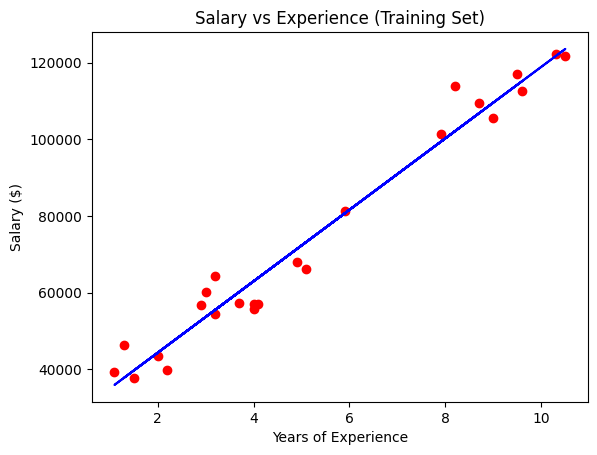

In [27]:
#Formatting
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")

#Scatter Plot
plt.scatter(X_train, y_train, color="red")

#Line Plot
plt.plot(X_train, simple_regressor.predict(X_train), color="blue")
plt.show()

<a id="6.2"></a>
## 6.2 Test Set Results
[Go back to Index](#index)

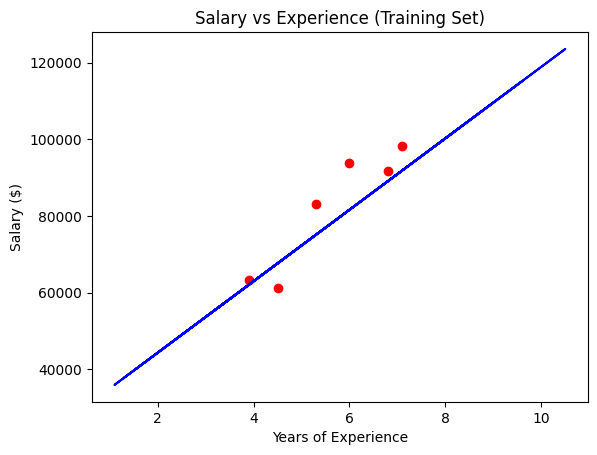

In [28]:
#Formatting
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")

#Scatter Plot
plt.scatter(X_test, y_test, color="red")

#Line Plot
plt.plot(X_train, simple_regressor.predict(X_train), color="blue")
plt.show()

<a id="7"></a>
# 7. Data Analysis 
[Go back to Index](#index)

## Q1. Predict the salary of an employee with 10 years of experience

In [29]:
y_pred = simple_regressor.predict([[10]])
y_pred = "".join(str(x) for x in y_pred)
print("The expected salary is: $" + y_pred)

The expected salary is: $118939.34537828203
